In [35]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd


In [4]:
iris = pd.read_csv("iris2.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# sample method is used to get the random data, number of rows is passed as a parameter n
iris.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,13,4.8,3.0,1.4,0.1,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
iris.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [7]:
sl_med = iris['SepalLengthCm'].median()
sw_med = iris['SepalWidthCm'].median()
pl_med = iris['PetalLengthCm'].median()
pw_med = iris['PetalWidthCm'].median()
values = {'SepalLengthCm': sl_med, 'SepalWidthCm': sw_med, 'PetalLengthCm': pl_med, 'PetalWidthCm': pw_med}
iris = iris.fillna(value=values)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
iris = iris.replace('Iris-setosa', 0)
iris = iris.replace('Iris-virginica',1)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [9]:
iris = iris.drop(columns=['Id'])
iris.corr()
# There are no variables which have a correlation in range -0.1 to 0.1 with target variable

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [11]:
iris.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

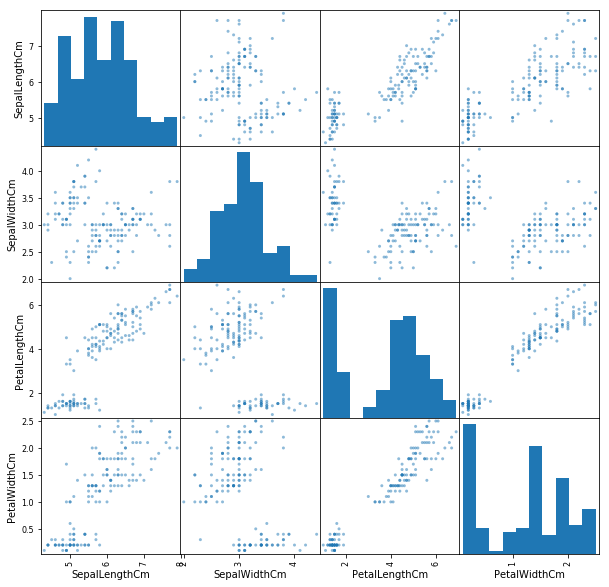

In [27]:
sc_plot = pd.plotting.scatter_matrix(iris,figsize=(10,10))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [36]:
from sklearn.model_selection import train_test_split
y = iris['Species']
X = iris.drop(columns='Species')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Score for K=3:",knn.score(X_test,y_test))
print("Accuracy Score for K=3:", accuracy_score(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Score for K=5:",knn.score(X_test,y_test))
print("Accuracy Score for K=5:", accuracy_score(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Score for K=9:",knn.score(X_test,y_test))
print("Accuracy Score for K=9:", accuracy_score(y_test, y_pred))

ValueError: Unknown label type: 'unknown'

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [73]:
neigh = np.arange(1,20,2)
MSE_list = []
for i,k in enumerate(neigh):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    MSE_list.append(1 - accuracy_score(y_test,y_pred))
    print("Number of Neighbour:",k)
    print("MSE:",1- accuracy_score(y_test,y_pred))
print("Lowest MSE:",min(MSE_list))

ValueError: Unknown label type: 'unknown'

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [71]:
from matplotlib import pyplot as plt

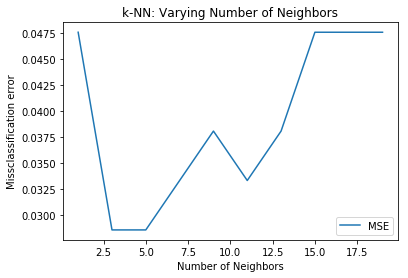

In [72]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neigh, MSE_list, label = 'MSE')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Missclassification error')
plt.show()

### Question 11: Read the data given in bc2.csv file

In [46]:
bc2 = pd.read_csv("bc2.csv")
bc2

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 12: Observe the no.of records in dataset and type of each feature 

In [47]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [48]:
bc2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Check Missing Values

In [49]:
bc2.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [50]:
bc2.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [51]:
print("Count of ?:",str(len(bc2[bc2['Bare Nuclei']=='?'])))
bc2=bc2.replace('?',1)
bc2

Count of ?: 16


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 15: Find the distribution of target variable (Class) 

In [52]:
bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([241. , 262.7, 284.4, 306.1, 327.8, 349.5, 371.2, 392.9, 414.6,
        436.3, 458. ]),
 <a list of 10 Patch objects>)

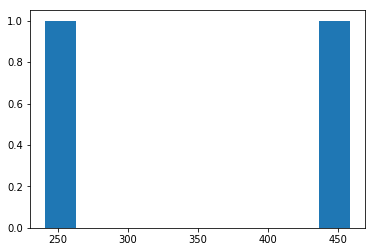

In [53]:
plt.hist(bc2['Class'].value_counts())

### convert the datatype of Bare Nuclei to `int`

In [57]:
bc2["Bare Nuclei"] = bc2["Bare Nuclei"].astype(int)
bc2["Bare Nuclei"]

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: int32

### Question 16: Standardization of Data

In [58]:
from sklearn import preprocessing as pp
Class = bc2['Class']
bc2_new = bc2.drop(columns=['Class','ID'])

In [59]:
scaler = pp.StandardScaler().fit(bc2_new) 
rescaledbc2 = scaler.transform(bc2_new)
rescaledbc2

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

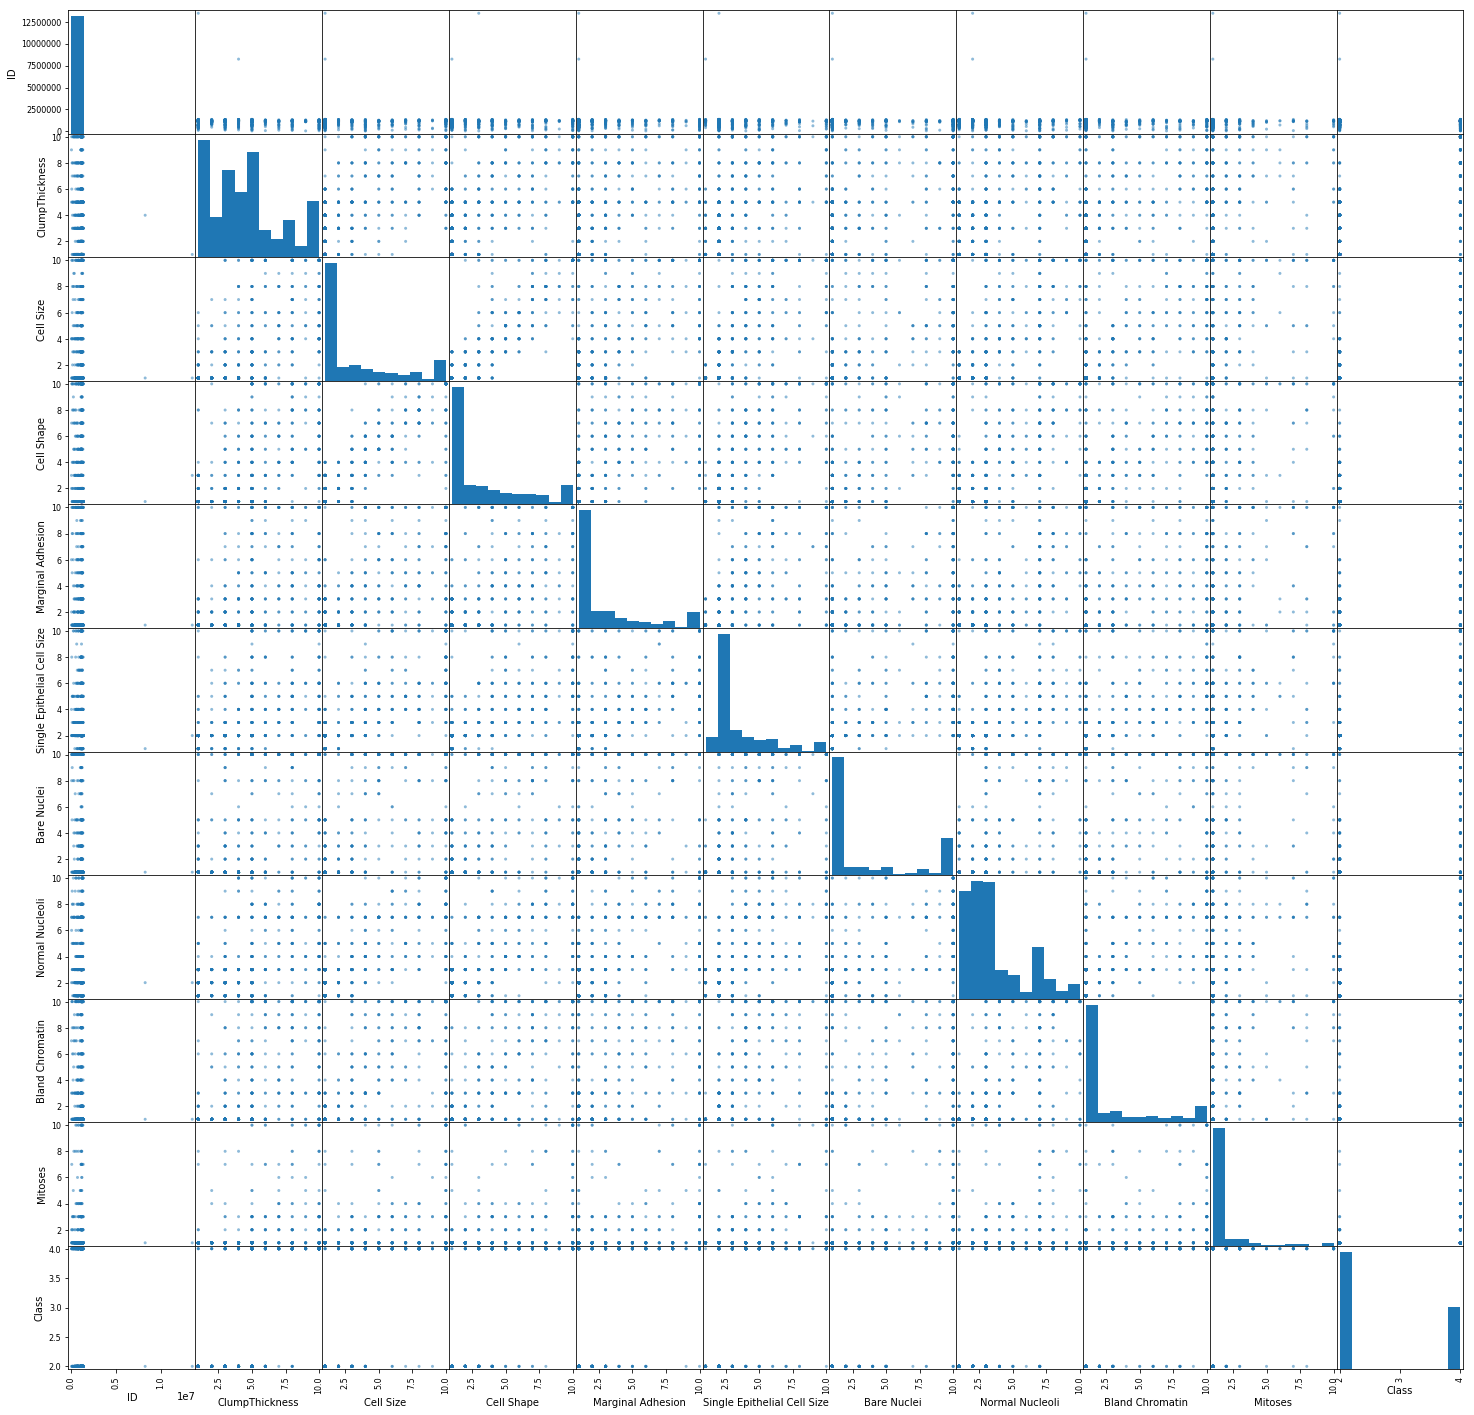

In [60]:
bc_plot = pd.plotting.scatter_matrix(bc2,figsize=(25,25))

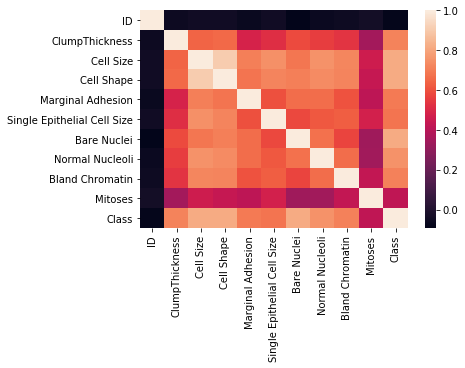

In [61]:
import seaborn as sns
sns.heatmap(bc2.corr())

In [64]:
bc2 = bc2.drop(columns='Cell Size')

KeyError: "['Cell Size'] not found in axis"

### Question 18: Divide the dataset into feature set and target set

In [65]:
Class.shape

(699,)

In [66]:
bc2_new.shape

(699, 9)

### Divide the Training and Test sets in 70:30 

In [67]:
bc2_train, bc2_test, class_train, class_test = train_test_split(bc2_new, Class, test_size=0.30, random_state=1)

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [68]:
neighbor = np.arange(1,20,2)
MSE_list = []
for i,k in enumerate(neighbor):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(bc2_train,class_train)
    class_pred = knn.predict(bc2_test)
    MSE_list.append(1 - accuracy_score(class_test,class_pred))
    print("Number of Neighbour:",k)
    print("MSE:",1- accuracy_score(class_test,class_pred))
print("Lowest MSE:",min(MSE_list))

Number of Neighbour: 1
MSE: 0.04761904761904767
Number of Neighbour: 3
MSE: 0.02857142857142858
Number of Neighbour: 5
MSE: 0.02857142857142858
Number of Neighbour: 7
MSE: 0.033333333333333326
Number of Neighbour: 9
MSE: 0.03809523809523807
Number of Neighbour: 11
MSE: 0.033333333333333326
Number of Neighbour: 13
MSE: 0.03809523809523807
Number of Neighbour: 15
MSE: 0.04761904761904767
Number of Neighbour: 17
MSE: 0.04761904761904767
Number of Neighbour: 19
MSE: 0.04761904761904767
Lowest MSE: 0.02857142857142858


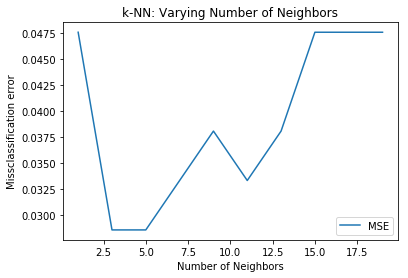

In [69]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbor, MSE_list, label = 'MSE')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Missclassification error')
plt.show()

### Question 20: Print the optimal number of neighbors

In [70]:
for i,v in enumerate(MSE_list):
    if v == min(MSE_list):
        print("Optimal number of Neighbor:",neighbor[i])

Optimal number of Neighbor: 3
Optimal number of Neighbor: 5
